# Function: predict_multiple_points
This function, predict_multiple_points, is designed to predict the cluster labels for a set of new data points using a pre-trained DBSCAN model. The function finds the nearest core points in the DBSCAN clustering result and assigns the corresponding labels to the new points. If a point is too far from any core points (beyond the eps distance), it will be labeled as noise (label -1). This function is particularly useful when you want to extend the clustering model to new data without retraining the model.

## Key Features:

Leverages the core points from the DBSCAN model to make predictions for new data points.
Handles cases where new points are outliers and cannot be assigned to any existing cluster.
Provides an efficient way to classify new data based on an existing clustering model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

def predict_multiple_points(dbscan, new_points, X):
    """
    Predict the labels of multiple new points using a trained DBSCAN model.

    This function finds the nearest core points from the DBSCAN clustering
    and assigns the corresponding labels to the new points. If a new point
    is farther than `eps` from any core point, it will be labeled as noise (-1).

    Parameters:
    ----------
    dbscan : DBSCAN
        A trained DBSCAN clustering model from scikit-learn.

    new_points : array-like of shape (n_samples, n_features)
        New data points for which the labels need to be predicted.

    X : array-like of shape (n_samples, n_features)
        The original dataset used to train the DBSCAN model.

    Returns:
    -------
    labels : ndarray of shape (n_samples,)
        The predicted labels for the new points. Points that do not have
        any nearby core point within `eps` distance will be labeled as -1.

    Notes:
    -----
    - The function assumes that the DBSCAN model has already been fitted to the data.
    - If there are no core points (e.g., due to very high `eps` or very small `min_samples`), all new points will be labeled as -1.

    Example:
    --------
    >>> dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
    >>> new_points = np.array([[0.5, 0.5], [2.0, 2.0]])
    >>> labels = predict_multiple_points(dbscan, new_points, X)
    >>> print(labels)
    [0, -1]
    """
    # Convert X to a NumPy array (if it isn't already)
    X = np.array(X)

    # Check if core_sample_indices_ is an integer array
    core_indices = np.array(dbscan.core_sample_indices_)

    # Perform nearest neighbor search only on core points
    core_samples = X[core_indices]
    core_labels = dbscan.labels_[core_indices]

    # Use NearestNeighbors to find the closest core points
    if len(core_samples) > 0:
        nearest_neighbors = NearestNeighbors(n_neighbors=1).fit(core_samples)
        distances, indices = nearest_neighbors.kneighbors(new_points)
        labels = core_labels[indices.flatten()]

        # Handle the case where no nearby core samples are found (points with distances exceeding eps)
        labels[distances.flatten() > dbscan.eps] = -1
    else:
        labels = [-1]*len(new_points)
    
    return labels


# DBSCAN Clustering and New Data Points Prediction
In this section, we demonstrate how to perform clustering using the DBSCAN algorithm and predict the cluster labels for new data points. The steps include generating sample data, training a DBSCAN model, defining new data points for prediction, and visualizing the clustering results along with the predicted labels for the new points. This example provides a practical use case for clustering and label prediction in machine learning.

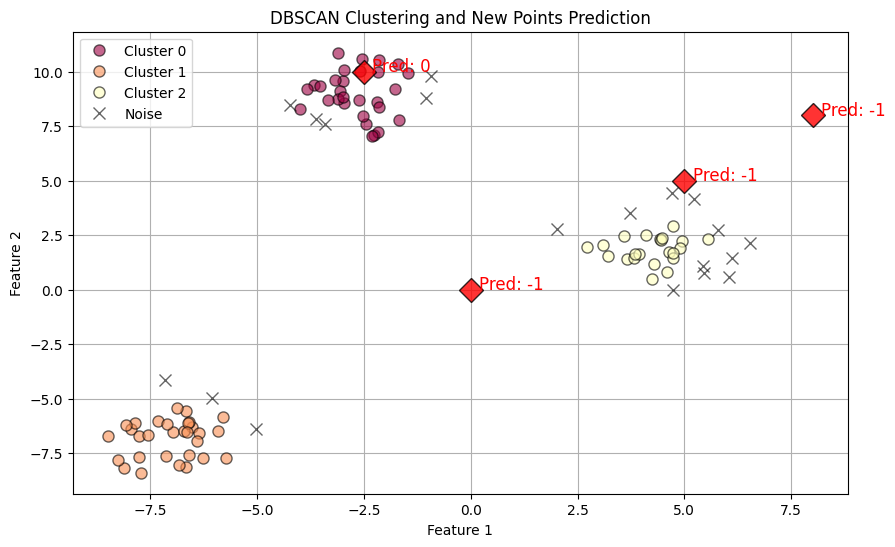

In [3]:
# Generate sample data for clustering
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Train a DBSCAN clustering model
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(X)

# Define new data points for prediction
new_points = np.array([[0, 0], [5, 5], [8, 8], [-2.5, 10]])

# Predict the cluster labels of the new data points using the trained DBSCAN model
predicted_labels = predict_multiple_points(dbscan, new_points, X)

# Visualization of the clustering results and the predicted labels
plt.figure(figsize=(10, 6))

# Plot the original data points, coloring them based on their cluster labels
unique_labels = set(dbscan.labels_)
for label in unique_labels:
    if label == -1:
        # Label noise points with black color and 'x' marker
        color = 'black'
        marker = 'x'
    else:
        # Label other clusters with distinct colors and 'o' markers
        color = plt.cm.Spectral(label / len(unique_labels))
        marker = 'o'
    
    # Select points belonging to the current cluster
    class_member_mask = (dbscan.labels_ == label)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=color, markeredgecolor='k', markersize=8, alpha=0.6, label=f'Cluster {label}' if label != -1 else 'Noise')

# Plot the new data points and annotate them with their predicted labels
for i, point in enumerate(new_points):
    plt.plot(point[0], point[1], 'D', markerfacecolor='red', markeredgecolor='k', markersize=12, alpha=0.8)
    plt.text(point[0] + 0.2, point[1], f'Pred: {predicted_labels[i]}', fontsize=12, color='red')

plt.title('DBSCAN Clustering and New Points Prediction')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()
